In [1]:
!git clone https://github.com/ultralytics/yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 16057, done.
remote: Total 16057 (delta 0), reused 0 (delta 0), pack-reused 16057
Receiving objects: 100% (16057/16057), 14.68 MiB | 24.84 MiB/s, done.
Resolving deltas: 100% (11032/11032), done.


In [2]:
!pip install -r yolov5/requirements.txt

  Obtaining dependency information for ultralytics>=8.0.147 from https://files.pythonhosted.org/packages/e6/27/90daa13a80ece0e45f693bbce0413f24f7f42bb7d08e4fd4fdc45f10febd/ultralytics-8.0.208-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.2/645.2 kB 16.0 MB/s eta 0:00:00


In [3]:
import torch
import os
from IPython.display import Image, clear_output

In [4]:
%cd yolov5

/kaggle/working/yolov5


In [5]:
!cp -r /kaggle/input/number-plate-dataset/Number_Plate_Dataset /kaggle/working/yolov5

In [6]:
!python train.py --img 416 --batch 16 --epochs 500 --data Number_Plate_Dataset/data.yml --weights yolov5s.pt --cache

wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
wandb: (1) Create a W&B account
wandb: (2) Use an existing W&B account
wandb: (3) Don't visualize my results
wandb: Enter your choice: (30 second timeout) 
wandb: W&B disabled due to login timeout.
train: weights=yolov5s.pt, cfg=, data=Number_Plate_Dataset/data.yml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://gith

In [7]:
%load_ext tensorboard
%tensorboard --logdir runs


In [8]:
!python detect.py --weights runs/train/exp/weights/best.pt --img 416 --conf 0.2 --source Number_Plate_Dataset/test/images

detect: weights=['runs/train/exp/weights/best.pt'], source=Number_Plate_Dataset/test/images, data=data/coco128.yaml, imgsz=[416, 416], conf_thres=0.2, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
requirements: Ultralytics requirement ['Pillow>=10.0.1'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 11.3s, installed 1 package: ['Pillow>=10.0.1']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect

YOLOv5 🚀 v7.0-240-g84ec8b5 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/15 /kaggle/working/yolov5/Number_Plate_Dataset/test/images/fra

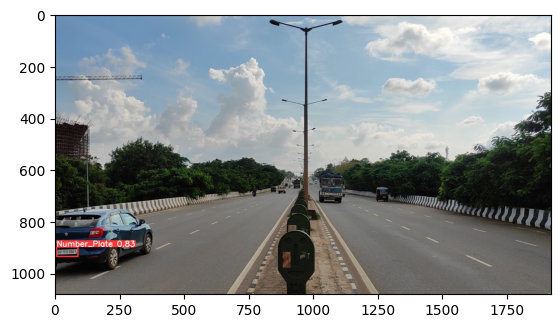

In [9]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load an image using PIL
image_path = '/kaggle/working/yolov5/runs/detect/exp/frame-4790.jpg'
image = Image.open(image_path)

# Convert the image to a NumPy array
image_array = np.array(image)

# Display the image using plt.imshow
plt.imshow(image_array)

# Show the plot
plt.show()
